The ISIC Archive is full of pictures of skin lesions. It's used to train AI systems to spot and analyze skin cancer. It's a great resource for people doing medical and AI research.

In this task, you'll be using the metadata from the ISIC 2019 challenge, which is connected to the ISIC Archive.

First off, check out what the ISIC 2019 challenge is all about: https://challenge.isic-archive.com/landing/2019/Links to an external site.

Then, download (https://challenge.isic-archive.com/data/#2019Links to an external site.) the metadata (not the images!) for the ISIC 2019 dataset. It's got 25,331 entries about stuff like age, sex, where the lesion is on the body, and what type of lesion it is.

Your job is to make a table that summarizes the details about the patients and lesions in the dataset. Take a look for any potential bias and talk about any concerns you might have. Show your findings with visuals / plots and explain these.

Have fun!

In [67]:
import pandas as pd

# Load the datasets
test_data_path = 'ISIC_2019_Test_Metadata.csv'
train_data_path = 'ISIC_2019_Training_Metadata.csv'
test_data = pd.read_csv(test_data_path)
train_data = pd.read_csv(train_data_path)

# Display basic information about the datasets
print("Training Data Information:")
print(train_data.info())
print("\nTraining Data Shape:", train_data.shape)

print("\nTest Data Information:")
print(test_data.info())
print("\nTest Data Shape:", test_data.shape)

Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB
None

Training Data Shape: (25331, 5)

Test Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                8238 non-null   object 
 1   age_approx           7912 non-null   float64
 2   anatom_site_general  7583 non-null   object 
 3   sex                  7899 non-null   o

In [68]:
# Display first few rows of the training data
print("First 5 Rows of Training Data:")
print(train_data.head())

# Display first few rows of the test data
print("\nFirst 5 Rows of Test Data:")
print(test_data.head())


First 5 Rows of Training Data:
          image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male

First 5 Rows of Test Data:
          image  age_approx anatom_site_general     sex
0  ISIC_0034321        60.0                 NaN  female
1  ISIC_0034322        70.0      anterior torso    male
2  ISIC_0034323        70.0     lower extremity    male
3  ISIC_0034324        70.0     lower extremity    male
4  ISIC_0034325        30.0     upper extremity  female


In [69]:
# Display last few rows of the training data
print("Last 5 Rows of Training Data:")
print(train_data.tail())

# Display last few rows of the test data
print("\nLast 5 Rows of Test Data:")
print(test_data.tail())


Last 5 Rows of Training Data:
              image  age_approx anatom_site_general    lesion_id     sex
25326  ISIC_0073247        85.0           head/neck  BCN_0003925  female
25327  ISIC_0073248        65.0      anterior torso  BCN_0001819    male
25328  ISIC_0073249        70.0     lower extremity  BCN_0001085    male
25329  ISIC_0073251        55.0         palms/soles  BCN_0002083  female
25330  ISIC_0073254        50.0     upper extremity  BCN_0001079    male

Last 5 Rows of Test Data:
             image  age_approx anatom_site_general     sex
8233  ISIC_0073236        75.0      anterior torso    male
8234  ISIC_0073243        65.0     lower extremity    male
8235  ISIC_0073250        30.0      anterior torso  female
8236  ISIC_0073252        85.0           head/neck  female
8237  ISIC_0073253        70.0      anterior torso    male


In [70]:
# Check for missing values
print("Missing values in training data:")
print(train_data.isnull().sum())

print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in training data:
image                     0
age_approx              437
anatom_site_general    2631
lesion_id              2084
sex                     384
dtype: int64

Missing values in test data:
image                    0
age_approx             326
anatom_site_general    655
sex                    339
dtype: int64


In [71]:
# Unique values in categorical columns for training data
for column in train_data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column} (Training Data): {train_data[column].unique()}")

# Unique values in categorical columns for test data
for column in test_data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {column} (Test Data): {test_data[column].unique()}")


Unique values in image (Training Data): ['ISIC_0000000' 'ISIC_0000001' 'ISIC_0000002' ... 'ISIC_0073249'
 'ISIC_0073251' 'ISIC_0073254']
Unique values in anatom_site_general (Training Data): ['anterior torso' 'upper extremity' 'posterior torso' 'lower extremity'
 nan 'lateral torso' 'head/neck' 'palms/soles' 'oral/genital']
Unique values in lesion_id (Training Data): [nan 'MSK4_0011169' 'MSK4_0011170' ... 'BCN_0002147' 'BCN_0001946'
 'BCN_0001014']
Unique values in sex (Training Data): ['female' 'male' nan]

Unique values in image (Test Data): ['ISIC_0034321' 'ISIC_0034322' 'ISIC_0034323' ... 'ISIC_0073250'
 'ISIC_0073252' 'ISIC_0073253']

Unique values in anatom_site_general (Test Data): [nan 'anterior torso' 'lower extremity' 'upper extremity' 'head/neck'
 'posterior torso' 'palms/soles' 'oral/genital']

Unique values in sex (Test Data): ['female' 'male' nan]


In [72]:
train_sites = set(train_data['anatom_site_general'].unique())
test_sites = set(test_data['anatom_site_general'].unique())
print("Common anatomical sites:", train_sites.intersection(test_sites))
print("Training-only anatomical sites:", train_sites.difference(test_sites))
print("Test-only anatomical sites:", test_sites.difference(train_sites))

train_sexes = set(train_data['sex'].unique())
test_sexes = set(test_data['sex'].unique())
print("Common sexes:", train_sexes.intersection(test_sexes))
print("Training-only sexes:", train_sexes.difference(test_sexes))
print("Test-only sexes:", test_sexes.difference(train_sexes))


Common anatomical sites: {nan, 'posterior torso', 'lower extremity', 'anterior torso', 'oral/genital', 'palms/soles', 'upper extremity', 'head/neck'}
Training-only anatomical sites: {'lateral torso'}
Test-only anatomical sites: set()
Common sexes: {nan, 'female', 'male'}
Training-only sexes: set()
Test-only sexes: set()


In [73]:
# Identify categorical and numerical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: Index(['image', 'anatom_site_general', 'lesion_id', 'sex'], dtype='object')
Numerical Columns: Index(['age_approx'], dtype='object')


## Data Preparation

In [74]:
# Fill missing values in 'anatom_site_general' with 'Unknown' in both datasets
train_data['anatom_site_general'] = train_data['anatom_site_general'].fillna('Unknown')
test_data['anatom_site_general'] = test_data['anatom_site_general'].fillna('Unknown')

# Fill missing values in 'sex' with 'unknown' in both datasets
train_data['sex'] = train_data['sex'].fillna('unknown')
test_data['sex'] = test_data['sex'].fillna('unknown')


In [75]:
# Drop 'image' and 'lesion_id' columns as they are identifiers
train_data = train_data.drop(columns=['image', 'lesion_id'])
test_data = test_data.drop(columns=['image'])

# One-hot encode categorical variables
train_data_encoded = pd.get_dummies(train_data, columns=['anatom_site_general', 'sex'])
test_data_encoded = pd.get_dummies(test_data, columns=['anatom_site_general', 'sex'])

# Ensure both datasets have the same columns after encoding
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='inner', axis=1)

# Display the first few rows to verify the encoding
print("First 5 Rows of Encoded Training Data:")
print(train_data_encoded.head())

print("\nFirst 5 Rows of Encoded Teste Data:")
print(test_data_encoded.head())


First 5 Rows of Encoded Training Data:
   age_approx  anatom_site_general_Unknown  \
0        55.0                        False   
1        30.0                        False   
2        60.0                        False   
3        30.0                        False   
4        80.0                        False   

   anatom_site_general_anterior torso  anatom_site_general_head/neck  \
0                                True                          False   
1                                True                          False   
2                               False                          False   
3                               False                          False   
4                               False                          False   

   anatom_site_general_lower extremity  anatom_site_general_oral/genital  \
0                                False                             False   
1                                False                             False   
2                      

In [76]:
# Check that both datasets have the same columns
print("Columns in Encoded Training Data:")
print(train_data_encoded.columns)

print("\nColumns in Encoded Test Data:")
print(test_data_encoded.columns)


Columns in Encoded Training Data:
Index(['age_approx', 'anatom_site_general_Unknown',
       'anatom_site_general_anterior torso', 'anatom_site_general_head/neck',
       'anatom_site_general_lower extremity',
       'anatom_site_general_oral/genital', 'anatom_site_general_palms/soles',
       'anatom_site_general_posterior torso',
       'anatom_site_general_upper extremity', 'sex_female', 'sex_male',
       'sex_unknown'],
      dtype='object')

Columns in Encoded Test Data:
Index(['age_approx', 'anatom_site_general_Unknown',
       'anatom_site_general_anterior torso', 'anatom_site_general_head/neck',
       'anatom_site_general_lower extremity',
       'anatom_site_general_oral/genital', 'anatom_site_general_palms/soles',
       'anatom_site_general_posterior torso',
       'anatom_site_general_upper extremity', 'sex_female', 'sex_male',
       'sex_unknown'],
      dtype='object')


## Visualize Distribution

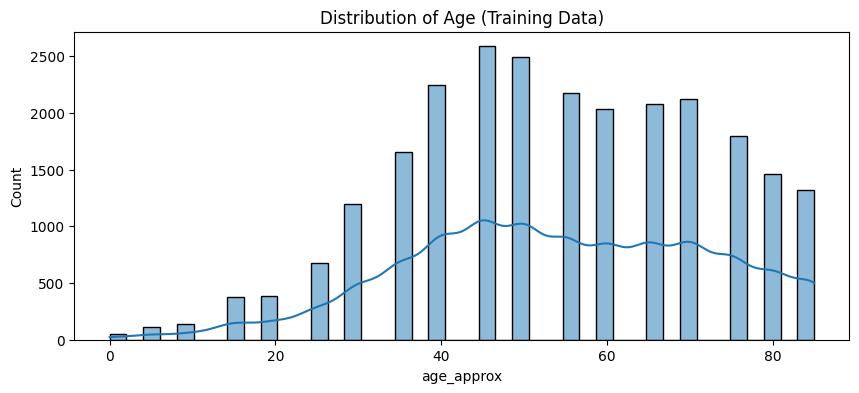

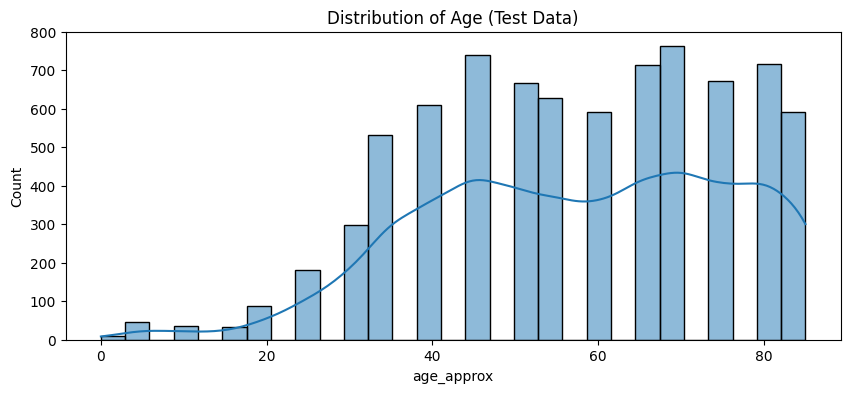

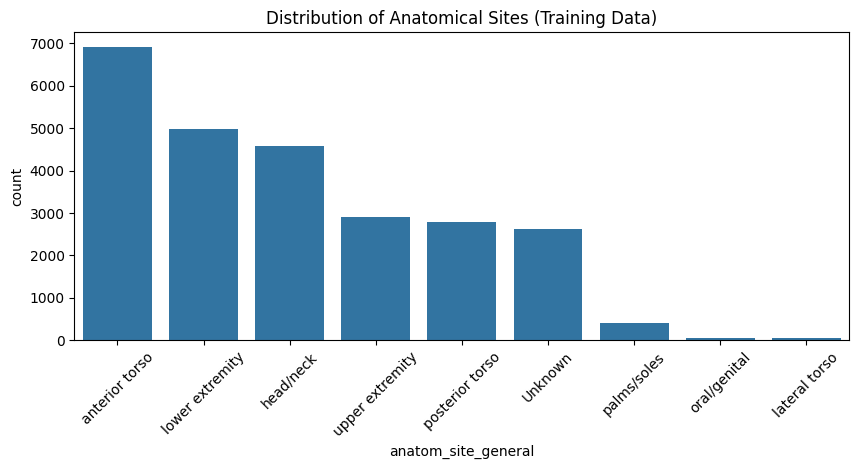

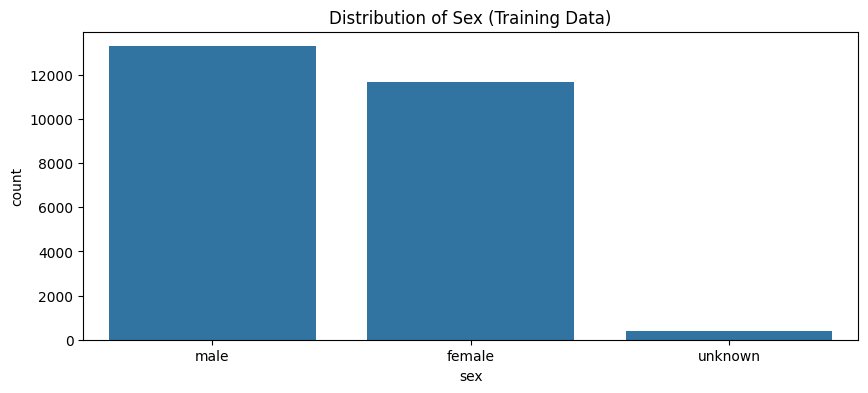

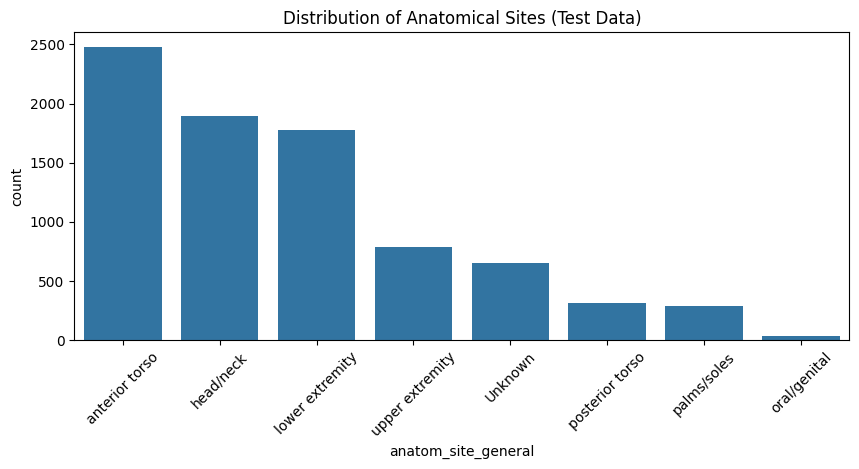

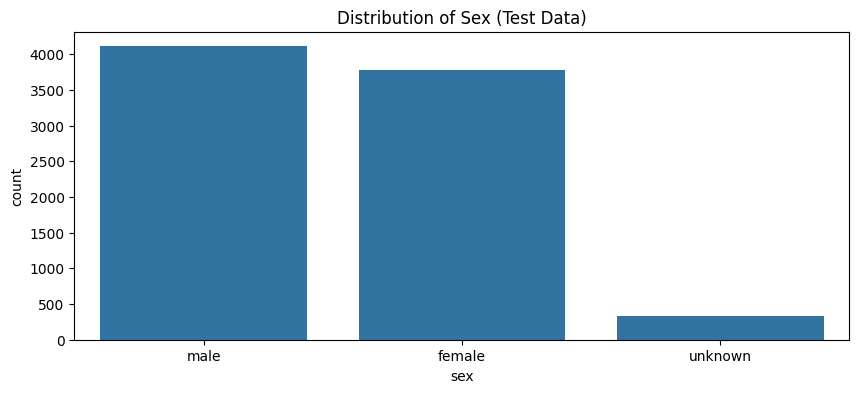

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots for numerical features in training data
plt.figure(figsize=(10, 4))
sns.histplot(train_data['age_approx'], kde=True)
plt.title('Distribution of Age (Training Data)')
plt.show()

# Distribution plots for numerical features in test data
plt.figure(figsize=(10, 4))
sns.histplot(test_data['age_approx'], kde=True)
plt.title('Distribution of Age (Test Data)')
plt.show()

# Count plots for categorical features in training data
plt.figure(figsize=(10, 4))
sns.countplot(data=train_data, x='anatom_site_general', order=train_data['anatom_site_general'].value_counts().index)
plt.title('Distribution of Anatomical Sites (Training Data)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=train_data, x='sex', order=train_data['sex'].value_counts().index)
plt.title('Distribution of Sex (Training Data)')
plt.show()

# Count plots for categorical features in test data
plt.figure(figsize=(10, 4))
sns.countplot(data=test_data, x='anatom_site_general', order=test_data['anatom_site_general'].value_counts().index)
plt.title('Distribution of Anatomical Sites (Test Data)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=test_data, x='sex', order=test_data['sex'].value_counts().index)
plt.title('Distribution of Sex (Test Data)')
plt.show()


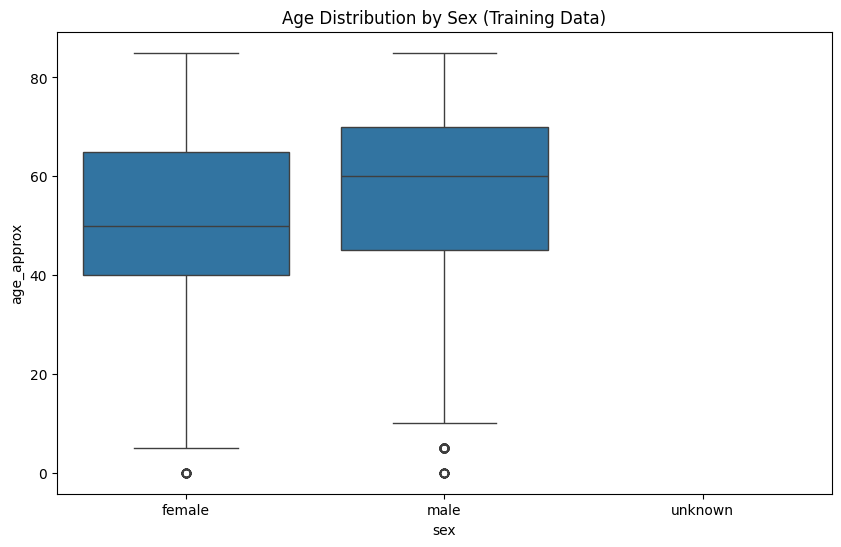

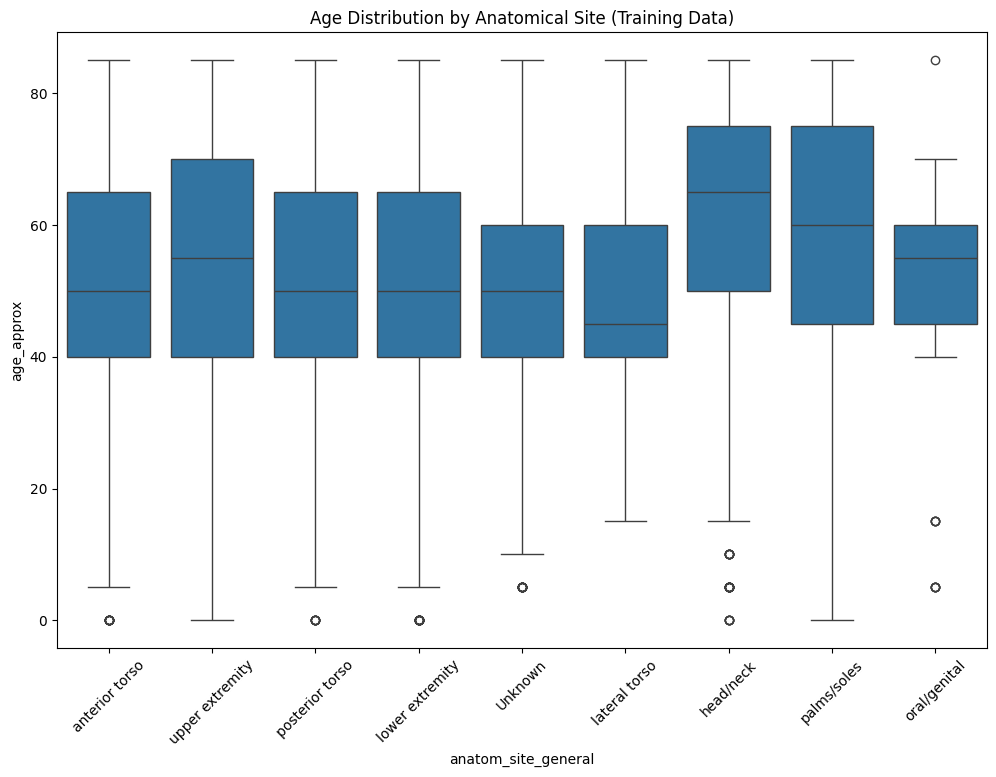

In [78]:
# Age distribution by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age_approx', data=train_data)
plt.title('Age Distribution by Sex (Training Data)')
plt.show()

# Age distribution by anatomical site
plt.figure(figsize=(12, 8))
sns.boxplot(x='anatom_site_general', y='age_approx', data=train_data)
plt.title('Age Distribution by Anatomical Site (Training Data)')
plt.xticks(rotation=45)
plt.show()

## Evaluation

Let's analyze the two box plots you have provided:

### Plot 1: Age Distribution by Sex (Training Data)

**Observations:**
1. **Median Age:**
   - The median age for both males and females is around 50-55 years.
   - The median age for the unknown sex category is slightly higher.

2. **Interquartile Range (IQR):**
   - The IQR (middle 50% of the data) for males and females is quite similar, spanning from approximately 40 to 70 years.
   - The IQR for the unknown sex category is wider, indicating more variability in ages.

3. **Outliers:**
   - There are some younger individuals (outliers) in the male and unknown sex categories.

### Potential Bias:
- **Balanced Age Distribution:** The age distribution between males and females appears to be fairly balanced, which is good for model training as it suggests that the model will have exposure to a similar age range across sexes.
- **Unknown Sex Category:** The wider IQR and higher variability in the unknown sex category could be a potential concern. It might be useful to investigate why these records have unknown sex and whether they should be treated separately or imputed differently.

### Plot 2: Age Distribution by Anatomical Site (Training Data)

**Observations:**
1. **Median Age:**
   - The median age varies slightly across different anatomical sites.
   - Sites like the anterior torso, upper extremity, and posterior torso have a median age around 55-60 years.
   - Sites like the palms/soles and genital have lower median ages.

2. **Interquartile Range (IQR):**
   - The IQR is similar across most sites, indicating consistent age distribution.
   - Some sites like the palms/soles have a narrower IQR, indicating less variability in ages.

3. **Outliers:**
   - There are outliers in most anatomical sites, indicating the presence of younger or older individuals beyond the typical age range.

### Potential Bias:
- **Age Distribution Across Sites:** The age distribution across different anatomical sites seems relatively consistent, which is good. However, sites like the palms/soles and genital areas have lower median ages and narrower IQRs, which could affect model performance if these sites are underrepresented or have unique characteristics.
- **Consistent Distribution:** Generally, having a consistent age distribution across different sites is beneficial for model training as it ensures that the model can learn from a diverse age range across various anatomical locations.

### Summary and Recommendations:

1. **Balanced Age and Sex Distribution:**
   - The balanced age distribution across sexes suggests that the model will not be biased towards a particular sex based on age.

2. **Investigate Unknown Sex:**
   - The variability in the unknown sex category warrants further investigation. It might be helpful to check if these records can be updated or if they should be treated separately.

3. **Consider Anatomical Site Variability:**
   - While the overall age distribution across anatomical sites is consistent, some sites with lower median ages or narrower IQRs might need special attention. Ensure these sites are adequately represented in your training data.

4. **Further Analysis:**
   - Conduct further analysis on the relationship between other features and the target variable to uncover additional potential biases.

By understanding these distributions, you can better prepare your data and ensure that your model is trained on a well-balanced and representative dataset. This analysis helps in identifying and mitigating potential biases that could affect the model's performance. If you have any specific questions or need further assistance, feel free to ask!